In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Types of Frauds
- Online fraud
- Credit card fraud
- Threat
- Theft of inventory
# Ways of detecting fraud
## Rule-based approach
 Those are algorithms written by fraud analysts, based on strict rules, the changes for detecting a new fraud are done manually.
 When the customers increases the data also increases and for that reason human effort increases, is time-consuming and costly
 
## Disadvantages
- Cannot recognize hidde patterns
- Cannot predict fraud by going beyond the rules
- Cannot respond to new situations, not trains on or explicitly programmed

## Data Science approach
## Machine learning

- Supervsed learning: Data labelling and unbalanced data
- Unsupervised learning: PCA and K-means clustering

## Challenges of Fraud detection model
- Unbalanced data
- Operational Efficiency
- Incorrect Flagging

## Dealing with unbalanced data
- Most of the transactions are legitimate
- Models learn better from a balanced distribution
- Classifier tends to favour majority class

## Sampling method to solve unbalanced data problem
- We perform the sampling in the training set
- Random Over Sampling (ROS)
- Random Under-Sampling (RUS)
- BOTH
- Synthetic Minority Over-Sampling technique (SMOTE)

In [3]:
path = r"C:\Users\alche\DataspellProjects\fraud_detection\archive\creditcard.csv"
df = pd.read_csv(path)
df.info()
# We have 284,807 records and 31 columns

# The Amount and Class columns correspond, with the former representing the transaction amount
# and the latter indicating whether the transaction is fraudulent or legitimate.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Glance a sample of the dataset
df.sample(10)
# Given the dataset description we know that the columns named "V1 ... " are already scaled,
# and we don't know what they are due to privacy reasons

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68530,53033.0,1.379885,-1.255822,0.787657,-1.462413,-1.653056,-0.019421,-1.437882,0.161763,-1.800502,...,0.024293,0.426724,0.006104,-0.000172,0.217944,-0.091201,0.058857,0.015690,29.00,0
39162,39719.0,-0.633656,0.835545,1.421651,-0.107774,0.847008,0.882300,0.575105,0.243803,-0.227342,...,-0.157146,-0.100425,0.159276,-0.686394,-0.544056,0.140066,0.021366,-0.135082,9.12,0
147056,88074.0,-0.526318,0.773382,-0.602100,-1.949990,2.546830,3.643235,-0.209286,1.175782,0.591812,...,-0.314100,-0.772782,-0.009743,0.558807,-0.083246,-0.228194,0.413452,0.159704,0.77,0
55012,46729.0,1.008402,-0.367903,0.595150,0.438348,-0.153385,1.177549,-0.554720,0.516594,0.817214,...,0.019921,0.392801,0.108885,-0.572856,0.114232,0.753866,0.033500,-0.003199,16.44,0
200636,133513.0,2.046759,-0.216941,-1.237484,0.222837,-0.027526,-0.701281,-0.027750,-0.078644,0.532903,...,-0.280548,-0.779489,0.297779,-0.447133,-0.326369,0.207679,-0.084650,-0.077339,1.29,0
213837,139417.0,-2.689206,1.471223,0.458845,-1.760316,-0.960531,0.399789,-0.706364,1.204113,-0.739165,...,-0.637866,-1.250820,-0.087158,0.206180,0.506854,0.147420,0.539568,0.379779,33.00,0
193869,130330.0,-2.819951,2.792783,-0.648313,-0.826099,0.465269,0.407951,-2.594761,-8.763926,0.779905,...,8.296937,-3.276216,0.375002,-0.207027,-0.948859,0.192214,0.559972,0.330608,2.46,0
281849,170461.0,-0.394739,0.175767,0.038996,-1.973004,-0.349474,-0.571406,-0.495585,0.577060,-0.963769,...,0.351127,0.751462,-0.202245,-0.522984,0.144876,-0.167048,-0.135234,-0.112592,24.99,0
156515,108274.0,1.120538,-1.365748,-3.677820,0.706739,2.691907,3.252146,0.724075,0.375201,0.923431,...,0.263127,-0.103606,-0.390993,0.664675,0.308283,-0.553941,-0.131623,0.008292,491.10,0
103564,68714.0,1.025732,-0.290627,0.791371,0.892915,-0.575455,0.400860,-0.558411,0.223951,0.368115,...,0.167728,0.289144,-0.210753,-0.531243,0.396396,-0.336068,0.042497,0.037002,94.96,0


In [5]:
print(df.Class.dtype)

# Let's change Class column to a category one
df["Class"] = df["Class"].astype("category")

# Review the change
print(df.Class.dtype)

int64
category


In [6]:
# Explore the dataset by checking its descriptive statistics
df.describe()
# We can see that the mean of the transactions is very small (88 usd)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [7]:
# Check how many NANs we have
df.isna().sum()

# NICE! we don't have NAN's

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Now let's check the balance in the class column:
distribution_series = df.Class.value_counts()
print(distribution_series)

# We just have 492 fraud records
# Generate a percentage of the distribution
frauds = distribution_series[distribution_series.index == 1].values[0]
legitimate = distribution_series[distribution_series.index == 0].values[0]
total = frauds + legitimate
print("\nPercentage of frauds =", round(frauds/total*100,2), "%")
print("Percentage of legitimate =", round(legitimate/total*100,2),"%")

Class
0    284315
1       492
Name: count, dtype: int64

Percentage of frauds = 0.17 %
Percentage of legitimate = 99.83 %


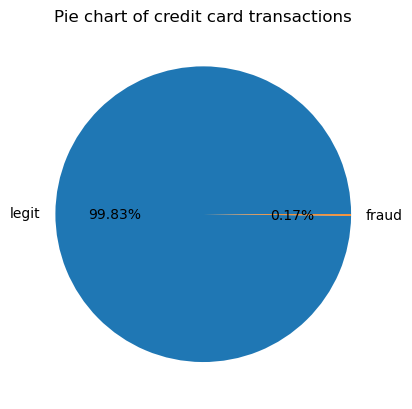

In [9]:
fig, ax = plt.subplots()
ax.pie(distribution_series, labels=["legit","fraud"], autopct='%1.2f%%')
ax.set_title('Pie chart of credit card transactions')
plt.show()

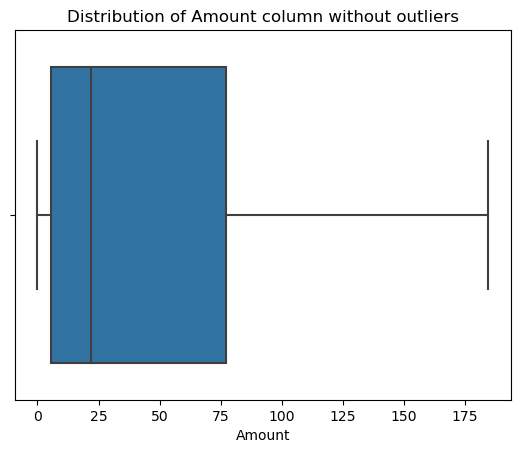

In [10]:
sns.boxplot(data=df,x="Amount",showfliers=False)
plt.title("Distribution of Amount column without outliers")
plt.show()

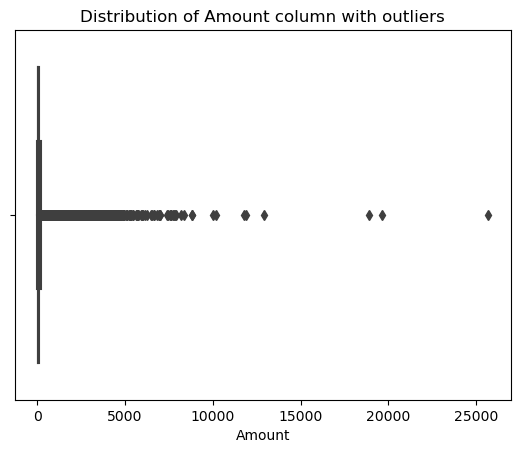

In [11]:
sns.boxplot(data=df,x="Amount",showfliers=True)
plt.title("Distribution of Amount column with outliers")
plt.show()

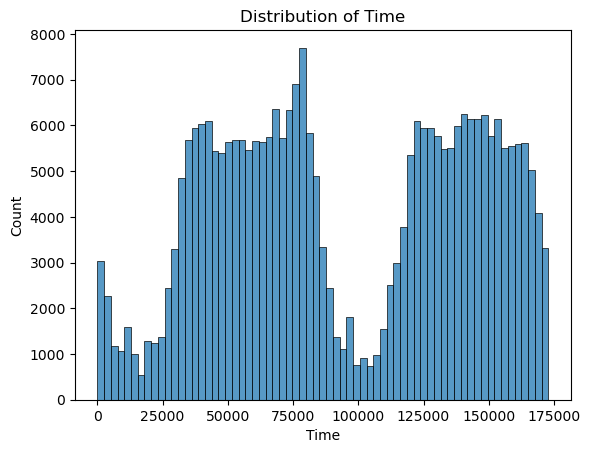

In [12]:
sns.histplot(data=df,x="Time")
plt.title("Distribution of Time")
plt.show()

# Scaling Time and Amount columns

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers
scaler = RobustScaler()

df["scaled_amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df["scaled_time"] = scaler.fit_transform(df["Time"].values.reshape(-1,1))

# drop the unscaled columns:
df.drop(['Time','Amount'], axis=1, inplace=True)


In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


# Splitting the data

Under-sampling is a technique used to deal with imbalanced datasets, which are common in many real-world problems such as fraud detection, medical diagnosis, and others where one class significantly outnumbers the other(s). In an imbalanced dataset, the majority class has a much higher number of instances than the minority class, which can lead to machine learning models being biased towards the majority class and not performing well on the minority class.

In [15]:
df1 = df.copy()

y = df.pop("Class")
X = df

In [16]:
print(f"Number of frauds records: {frauds}") #This is the number of frauds records
# Pick the indices of the fraud transactions:
fraud_index = df1[df1.Class == 1].index
# Pick the indices of the legitimate transactions:
legitimate_index = df1[df1.Class == 0].index

# We randomly select n number of legitimate transactions
random_legitimate_index = np.random.choice(legitimate_index, frauds, replace=False)

# Combine both indices
under_sampling_index = np.concatenate([random_legitimate_index, fraud_index])
print(f"Now we have the same number of frauds and good transactions, in total: {len(under_sampling_index)} records")

Number of frauds records: 492
Now we have the same number of frauds and good transactions, in total: 984 records


In [17]:
# Now create an instance of that data
under_sample_df = df1.iloc[under_sampling_index,:]
# Number of each class
frauds_under_sampling = len(under_sample_df[under_sample_df.Class == 1])
legitimate_under_sampling = len(under_sample_df[under_sample_df.Class == 0])

print(f"Percentage of frauds after under-sampling: {frauds_under_sampling/under_sample_df.shape[0]*100:.2f}% ")
print(f"Percentage of legitimate after under-sampling: {legitimate_under_sampling/under_sample_df.shape[0]*100:.2f}% ")


Percentage of frauds after under-sampling: 50.00% 
Percentage of legitimate after under-sampling: 50.00% 


In [18]:
# Create the new X and y 
X_undersample = under_sample_df.loc[:, under_sample_df.columns != 'Class']
y_undersample = under_sample_df.loc[:, under_sample_df.columns == 'Class']

# Splitting the data into train and test sets

In [19]:
from sklearn.model_selection import train_test_split

# Entire dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807


In [20]:
# Under sampled dataset

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(
    X_undersample,
    y_undersample, 
    test_size=0.3, 
    random_state=42
)

print("Number transactions train dataset: ", len(X_train_us))
print("Number transactions test dataset: ", len(X_test_us))
print("Total number of transactions: ", len(X_train_us)+len(X_test_us))

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [27]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Initialize classifiers
logistic = LogisticRegression(random_state=42, max_iter=1000)
svm = SVC(random_state=42)
knn = KNeighborsClassifier()

In [30]:

# Setup 10-fold stratified cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and print scores for each model
for model, name in zip([logistic, svm, knn], ['Logistic Regression', 'SVM', 'KNN']):

    cv_scores = cross_validate(
        model, 
        X_undersample, 
        y_undersample.values.ravel(), 
        cv=kfold, 
        scoring='recall',
        return_estimator=True, 
        return_train_score=True
    )

    
    print(f"{name} - Mean Recall Score: {np.mean(cv_scores['test_score']):.3f} (Standard Deviation: {np.std(cv_scores['test_score']):.3f})")
    print(f"Training Recall Scores: {cv_scores['train_score']}\n")

Logistic Regression - Mean Recall Score: 0.915 (Standard Deviation: 0.038)
Training Recall Scores: [0.9255079  0.9255079  0.91628959 0.91855204 0.92099323 0.91873589
 0.91873589 0.93453725 0.93227991 0.92776524]

SVM - Mean Recall Score: 0.890 (Standard Deviation: 0.044)
Training Recall Scores: [0.89616253 0.90293454 0.89819005 0.89819005 0.89164786 0.88939052
 0.88939052 0.9006772  0.9006772  0.90970655]

KNN - Mean Recall Score: 0.902 (Standard Deviation: 0.043)
Training Recall Scores: [0.92099323 0.91422122 0.91628959 0.92081448 0.92099323 0.91873589
 0.91647856 0.9255079  0.9255079  0.9255079 ]



# Complete dataset

In [32]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logistic_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [33]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.06      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443

ROC-AUC Score: 0.9820414623584439


In [34]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(logistic_model, X, y, cv=kfold, scoring=scoring)

for metric in scoring:
    print(f"{metric.capitalize()} - Mean: {np.mean(cv_results['test_' + metric]):.3f}, Std: {np.std(cv_results['test_' + metric]):.3f}")


Accuracy - Mean: 0.977, Std: 0.001
Precision - Mean: 0.066, Std: 0.003
Recall - Mean: 0.912, Std: 0.035
F1 - Mean: 0.123, Std: 0.006
Roc_auc - Mean: 0.980, Std: 0.011


# Confusion matrix

In [35]:
# Assuming logistic_model is your trained LogisticRegression model
# and X_test is your test features
y_pred = logistic_model.predict(X_test)


In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
# [[TN, FP],
# [FN, TP]]


[[83156  2151]
 [   10   126]]


- TN is True Negatives: Non-fraudulent transactions correctly classified as non-fraudulent.
- FP is False Positives: Non-fraudulent transactions incorrectly classified as fraudulent.
- FN is False Negatives: Fraudulent transactions incorrectly classified as non-fraudulent.
- TP is True Positives: Fraudulent transactions correctly classified as fraudulent.

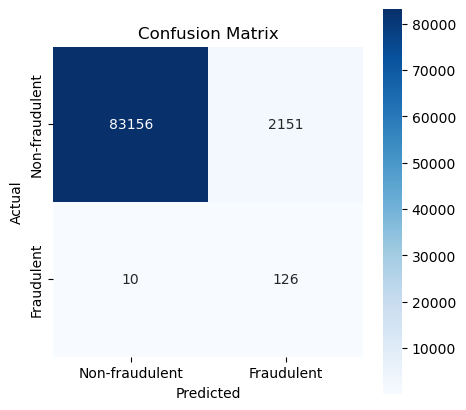

In [37]:
# Label the axes for better readability
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax, square=True,
            xticklabels=['Non-fraudulent', 'Fraudulent'],
            yticklabels=['Non-fraudulent', 'Fraudulent'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()


# Conclusion

My logistic regression model exhibits a profound ability to identify fraudulent transactions within an extensively imbalanced dataset, capturing 93% of fraud cases. This capability is highlighted by the model's recall score of 0.912, indicating its efficiency in detecting the majority of fraudulent activities, a critical attribute for any fraud detection system where missing fraudulent transactions could have significant financial implications.

While the model's precision is low, at approximately 0.066, indicating a higher rate of false positives—legitimate transactions erroneously flagged as fraudulent—it's a reflection of the complex trade-off in fraud detection systems between capturing as many frauds as possible (high recall) and minimizing incorrect fraud alerts (high precision). The relatively low F1 score of 0.123 suggests that this balance leans significantly towards recall, which in the context of fraud detection, is often prioritized to ensure minimal fraudulent transactions go undetected.

The model's overall accuracy stands at 97.7%, showcasing its effectiveness in correctly classifying the vast majority of transactions. However, given the class imbalance, this metric should be considered alongside the more indicative ROC-AUC score, which at 0.980, underscores the model's excellent capability to distinguish between fraudulent and legitimate transactions across a range of decision thresholds.

The confusion matrix further solidifies the model's strengths and weaknesses, revealing that while it successfully identifies 126 out of 136 actual fraud cases, it also misclassifies 2,151 legitimate transactions as fraudulent. This aspect underscores the need for continuous refinement of the model to better balance its precision and recall, possibly through advanced techniques, feature engineering, or exploring alternative models.

In conclusion, my model represents a significant step forward in fraud detection, particularly in its strong recall performance. The insights garnered from its current limitations provide valuable direction for future improvements, aiming for a more balanced approach without substantially sacrificing its ability to detect fraud.